In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Scipy:

In [58]:
month = list(range(1,13))
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [59]:
month

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

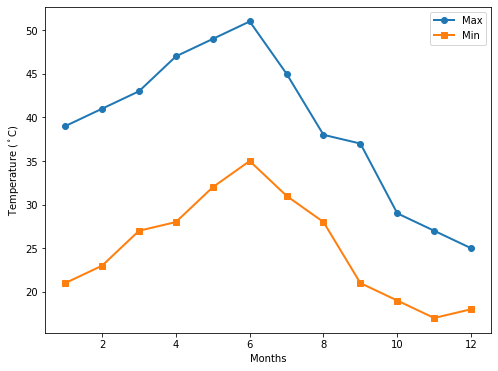

In [89]:
fig = plt.figure(figsize=(8,6))

plt.plot(month, Max, label='Max', lw=2, marker='o')
plt.plot(month, Min, label='Min', lw=2, marker='s')
plt.xlabel('Months')
plt.ylabel('Temperature ($^\circ$C)')
#plt.grid()
plt.legend(loc='upper right')


plt.show()

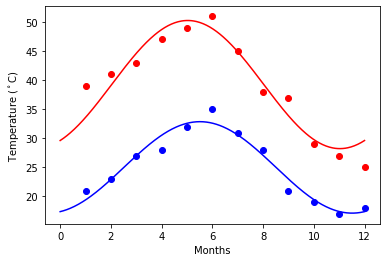

In [88]:
from scipy import optimize

def temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.sin((times + time_offset) * 2 * np.pi /times.max()))

res_max, cov_max = optimize.curve_fit(temps, month,Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(temps, month,Min, [-40, 20, 0])
days = np.linspace(0, 12, num=365)
plt.figure()

plt.plot(month,Max, 'ro')
plt.plot(days, temps(days, *res_max), 'r-')
plt.plot(month, Min, 'bo')
plt.plot(days, temps(days, *res_min), 'b-')

plt.ylabel('Temperature ($^\circ$C)')
plt.xlabel('Months')
plt.show()

#### Matplotlib:

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


1. Create a pie chart presenting the male/female proportion

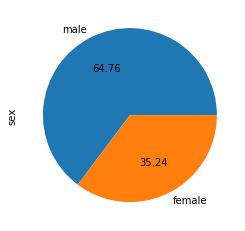

In [8]:
df.sex.value_counts().plot.pie(autopct='%.2f')

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender.

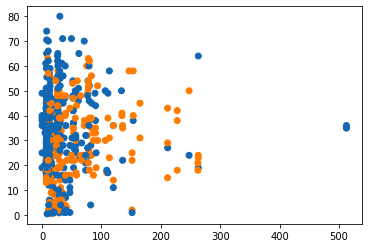

In [51]:
fig, ax = plt.subplots()
colors = {'male':'#1167b1', 'female':'#ff7b00'}
ax.scatter(df['fare'], df['age'], c=df['sex'].map(colors))
plt.show()